<a href="https://colab.research.google.com/github/MukeshMishraReloaded/Scaler-bootcamps/blob/main/rfm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
### Problem Statement :
---

We will be performing a RFM analysis for a chain of retail stores that sells a lot of
different items and categories.
The stores need to adjust their marketing budget and have better targeting of customers
so they need to know which customers to focus on and how important they are for the
business.

https://colab.research.google.com/drive/1Mf0Akhx03baqDf6vmTsApJG-1ItKTKHb?usp=sharing
___________
---

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the dataset -

df = pd.read_csv('sales.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.shape

(150983, 8)

In [ ]:
# Shape of the dataset -

print("No. of rows:" ,df.shape[0])
print("No. of cols:", df.shape[1])

No. of rows: 150983
No. of cols: 8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150983 entries, 0 to 150982
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    150983 non-null  int64  
 1   StockCode    150983 non-null  object 
 2   Description  150983 non-null  object 
 3   Quantity     150982 non-null  float64
 4   InvoiceDate  150982 non-null  object 
 5   UnitPrice    150982 non-null  float64
 6   CustomerID   150982 non-null  float64
 7   Country      150982 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 9.2+ MB


In [ ]:
df.dtypes

InvoiceNo        int64
StockCode       object
Description     object
Quantity       float64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [ ]:
df.isna().sum()*100/ len(df)

InvoiceNo      0.000000
StockCode      0.000000
Description    0.000000
Quantity       0.000662
InvoiceDate    0.000662
UnitPrice      0.000662
CustomerID     0.000662
Country        0.000662
dtype: float64

In [ ]:
df["InvoiceNo"].value_counts()

547063    276
543040    249
554098    243
556484    200
552039    167
         ... 
538721      1
538719      1
538716      1
542903      1
554159      1
Name: InvoiceNo, Length: 8070, dtype: int64

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
#Calculate Amount
df['Amount'] = df['UnitPrice'] * df['Quantity']

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
df_amount=df.groupby(["CustomerID"])['Amount'].sum().reset_index()
df_amount=df_amount.sort_values('Amount', ascending=False)
df_amount.head()

,CustomerID,Amount
1121,14646.0,109082.22
2756,18102.0,94440.92
0,12346.0,77183.60
36,12415.0,67373.31
2447,17450.0,56623.68


In [ ]:
#bins=[np.percentile(df_amount['Amount'], 0), np.percentile(df_amount['Amount'], 20), np.percentile(df_amount['Amount'], 40), np.percentile(df_amount['Amount'], 60), np.percentile(df_amount['Amount'], 80), np.percentile(df_amount['Amount'], 100)]
#labels=["super_low", "low", "average", "high", "super_high"]
#df_amount['M_Score'] = pd.cut(df_amount['Amount'], bins=bins, labels=labels)
df_amount['M_Score'] = pd.qcut(df_amount['Amount'], 5, labels=[1,2,3,4,5])
df_amount['M_Score'].value_counts()

1    569
5    569
2    568
3    568
4    568
Name: M_Score, dtype: int64

In [ ]:
df_freq=df.groupby('CustomerID')["InvoiceNo"].nunique().reset_index()
df_freq=df_freq.sort_values('InvoiceNo', ascending=False)
df_freq.rename(columns = {'InvoiceNo':'CustInvoiceCount'}, inplace = True)
df_freq.head(10)

,CustomerID,CustInvoiceCount
203,12748.0,91
1250,14911.0,67
2632,17841.0,52
1098,14606.0,51
361,13089.0,49
1450,15311.0,46
302,12971.0,42
698,13798.0,34
2636,17850.0,34
1771,16029.0,30


In [ ]:
df_freq['F_Score']= pd.qcut(df_freq['CustInvoiceCount'].rank(method='first'), 5, labels=[1,2,3,4,5])
df_freq['F_Score'].value_counts()

1    569
5    569
2    568
3    568
4    568
Name: F_Score, dtype: int64

In [ ]:
referenceDate=np.max(df["InvoiceDate"])
print(referenceDate)

2011-06-17 12:30:00


In [ ]:
df_recency=df.groupby(["CustomerID"])["InvoiceDate"].aggregate(['min', 'max']).reset_index()
df_recency['daysFromLastPurchase']= (referenceDate -  df_recency['max'])
df_recency.sort_values(by="daysFromLastPurchase", ascending=True, inplace=True)
df_recency.rename(columns ={'min':'firstPurchaseDate', 'max':'lastPurchaseDate'}, inplace = True)
df_recency.head(200)

,CustomerID,firstPurchaseDate,lastPurchaseDate,daysFromLastPurchase
2435,17426.0,2011-03-02 16:34:00,2011-06-17 12:30:00,0 days 00:00:00
2556,17677.0,2010-12-06 08:42:00,2011-06-17 12:23:00,0 days 00:07:00
1292,15021.0,2010-12-08 12:17:00,2011-06-17 12:16:00,0 days 00:14:00
272,12901.0,2011-03-14 10:41:00,2011-06-17 12:06:00,0 days 00:24:00
1536,15513.0,2010-12-01 11:22:00,2011-06-17 11:49:00,0 days 00:41:00
...,...,...,...,...
1585,15625.0,2011-04-18 14:01:00,2011-06-13 12:05:00,4 days 00:25:00
1528,15491.0,2011-04-18 10:04:00,2011-06-13 11:49:00,4 days 00:41:00
185,12714.0,2011-02-18 10:53:00,2011-06-13 11:41:00,4 days 00:49:00
454,13269.0,2010-12-05 11:51:00,2011-06-13 11:36:00,4 days 00:54:00


In [ ]:
df_recency['R_Score'] = pd.qcut(df_recency['daysFromLastPurchase'], 5, labels=[5,4,3,2,1])
df_recency['R_Score'].value_counts()

5    569
1    569
4    568
3    568
2    568
Name: R_Score, dtype: int64

In [ ]:
df_rfm=df_amount.merge(df_freq, on="CustomerID", how='inner')
df_rfm=df_rfm.merge(df_recency, on="CustomerID", how='inner')
df_rfm.info()
df_rfm.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2842 entries, 0 to 2841
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   CustomerID            2842 non-null   float64        
 1   Amount                2842 non-null   float64        
 2   M_Score               2842 non-null   category       
 3   CustInvoiceCount      2842 non-null   int64          
 4   F_Score               2842 non-null   category       
 5   firstPurchaseDate     2842 non-null   datetime64[ns] 
 6   lastPurchaseDate      2842 non-null   datetime64[ns] 
 7   daysFromLastPurchase  2842 non-null   timedelta64[ns]
 8   R_Score               2842 non-null   category       
dtypes: category(3), datetime64[ns](2), float64(2), int64(1), timedelta64[ns](1)
memory usage: 164.4 KB


CustomerID              0
Amount                  0
M_Score                 0
CustInvoiceCount        0
F_Score                 0
firstPurchaseDate       0
lastPurchaseDate        0
daysFromLastPurchase    0
R_Score                 0
dtype: int64

In [ ]:
df_rfm.sort_values(by=['R_Score', 'F_Score', 'M_Score'],
                   ascending=[False, False, False])[
                      ["CustomerID", "R_Score", "F_Score", "M_Score", "Amount", "CustInvoiceCount", "daysFromLastPurchase"]]

,CustomerID,R_Score,F_Score,M_Score,Amount,CustInvoiceCount,daysFromLastPurchase
79,17850.0,1,5,5,4783.46,34,196 days 21:03:00
141,15808.0,1,5,5,3314.22,4,130 days 21:57:00
762,14744.0,1,5,4,919.53,5,122 days 00:57:00
1031,16725.0,1,5,4,663.82,7,126 days 19:38:00
1108,13963.0,1,5,4,607.74,4,132 days 21:47:00
...,...,...,...,...,...,...,...
2740,13589.0,5,1,1,73.90,1,3 days 23:46:00
2744,13686.0,5,1,1,72.00,1,7 days 03:20:00
2778,16852.0,5,1,1,56.11,1,0 days 20:41:00
2791,18281.0,5,1,1,46.92,1,5 days 01:37:00


In [ ]:
df_rfm.groupby(['R_Score', 'F_Score', 'M_Score'])["CustomerID"].nunique()

R_Score  F_Score  M_Score
5        1        1          26
                  2          17
                  3          12
                  4           6
                  5           0
                             ..
1        5        1           1
                  2           1
                  3           2
                  4           3
                  5           2
Name: CustomerID, Length: 125, dtype: int64

In [ ]:
df_rfm['FM_Score'] = np.round((df_rfm['F_Score'].astype("int") + df_rfm['M_Score'].astype("int"))/2 , 0)
df_rfm

,CustomerID,Amount,M_Score,CustInvoiceCount,F_Score,firstPurchaseDate,lastPurchaseDate,daysFromLastPurchase,R_Score,FM_Score
0,14646.0,109082.22,5,27,5,2010-12-20 10:09:00,2011-06-01 10:24:00,16 days 02:06:00,4,5.0
1,18102.0,94440.92,5,18,5,2010-12-07 16:42:00,2011-06-14 11:31:00,3 days 00:59:00,5,5.0
2,12346.0,77183.60,5,1,1,2011-01-18 10:01:00,2011-01-18 10:01:00,150 days 02:29:00,1,3.0
3,12415.0,67373.31,5,8,5,2011-01-06 11:12:00,2011-06-15 13:37:00,1 days 22:53:00,5,5.0
4,17450.0,56623.68,5,15,5,2010-12-07 09:23:00,2011-06-16 18:40:00,0 days 17:50:00,5,5.0
...,...,...,...,...,...,...,...,...,...,...
2837,15863.0,9.20,1,1,2,2011-05-31 11:36:00,2011-05-31 11:36:00,17 days 00:54:00,4,2.0
2838,18018.0,7.50,1,1,1,2011-05-24 13:22:00,2011-05-24 13:22:00,23 days 23:08:00,4,1.0
2839,14285.0,5.90,1,1,2,2011-06-16 12:36:00,2011-06-16 12:36:00,0 days 23:54:00,5,2.0
2840,16738.0,3.75,1,1,1,2011-02-15 09:46:00,2011-02-15 09:46:00,122 days 02:44:00,1,1.0


In [ ]:
#defining function filter
def category_filter(df):
    if (df["R_Score"] >=4 and df["FM_Score"] ==5) or (df["R_Score"] ==5 and df["FM_Score"] >=4):
        return 'Champion'
    if (df["R_Score"] ==3 and df["FM_Score"] >=4) or (df["R_Score"] ==5 and df["FM_Score"] == 3) or (df["R_Score"] ==4 and df["FM_Score"] ==4):
        return 'Loyal Customer'
    if (df["R_Score"] >=4 and df["FM_Score"] ==2) or (df["R_Score"] ==3 and df["FM_Score"] ==3) or (df["R_Score"] ==4 and df["FM_Score"] ==3):
        return 'Potential Loyalist'
    if df["R_Score"] == 5 and df["FM_Score"] ==1:
        return 'Recent Customer'
    if (df["R_Score"] == 4 and df["FM_Score"] ==1) or (df["R_Score"] == 3 and df["FM_Score"] ==1):
        return 'Promising'
    if (df["R_Score"] == 3 and df["FM_Score"] ==2) or(df["R_Score"] == 2 and df["FM_Score"] ==2) or (df["R_Score"] == 2 and df["FM_Score"] ==3):
        return 'Customer Needing Attention'
    if df["R_Score"] == 2 and df["FM_Score"] ==1:
        return 'About to sleep'
    if (df["R_Score"] == 2 and df["FM_Score"] >=4) or (df["R_Score"] == 1 and df["FM_Score"] ==3):
        return 'At Risk'
    if df["R_Score"] == 1 and df["FM_Score"] >=4:
        return 'Cannot lose them'
    if df["R_Score"] == 1 and df["FM_Score"] ==2:
        return 'Hibernating'
    if df["R_Score"] == 1 and df["FM_Score"] ==1:
        return 'Lost'
#applying the filter function
df_rfm['category'] = df_rfm[["R_Score" , "FM_Score"]].apply(category_filter, axis=1)


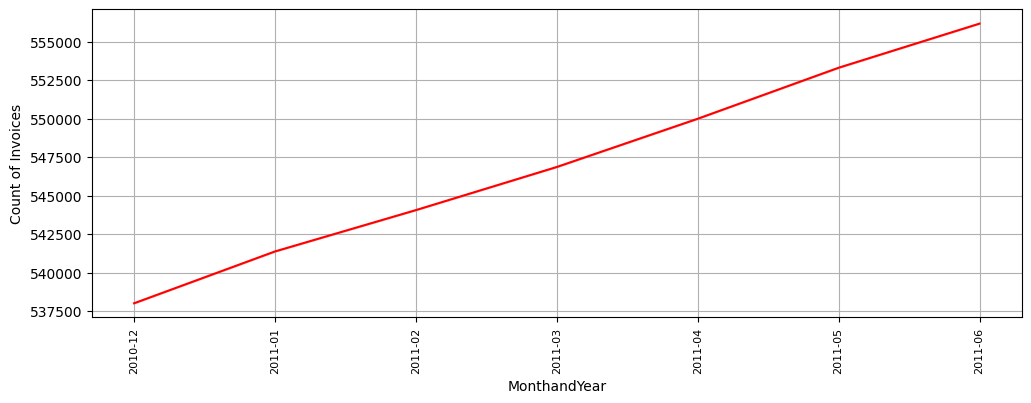

In [ ]:
df_time = df
df_time['MonthandYear'] = df['InvoiceDate'].dt.to_period('M').astype('string')
#Lineplot for time analysis
plt.figure(figsize=(12,4))
sns.lineplot(data=df_time, x='MonthandYear', y='InvoiceNo', color='r')
plt.xticks(rotation = 90, fontsize = 8)
plt.ylabel("Count of Invoices" , fontsize = 10)
plt.grid()
plt.show()

<Axes: xlabel='Quantity'>

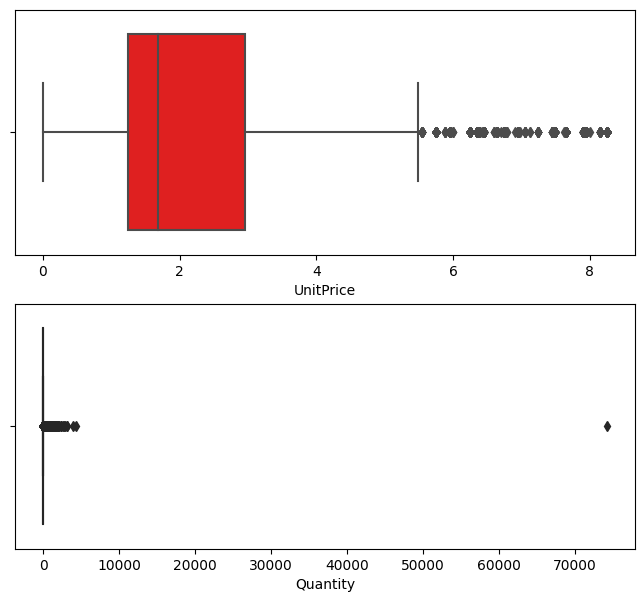

In [ ]:
#Detect outliers using boxplot(Univariate Analysis)
fig, axis= plt.subplots(2, 1, figsize=(8,7))
sns.boxplot(data=df, x="UnitPrice", orient='h', ax=axis[0], color='r')
sns.boxplot(data=df, x="Quantity", orient='h', ax=axis[1], color='g')

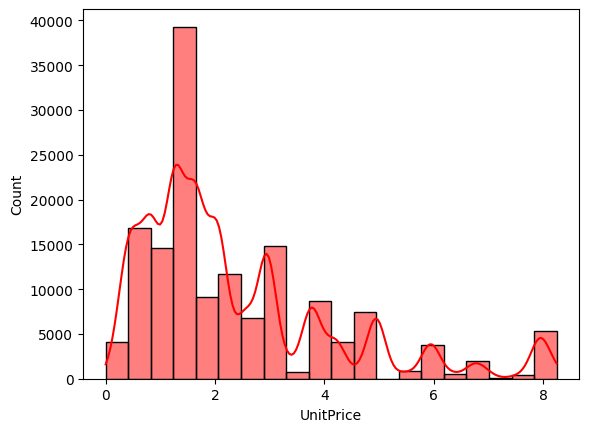

In [ ]:
#Detect outliers using histplot(Univariate Analysis)
fig = plt.plot(figsize=(13,12))
sns.histplot(df['UnitPrice'], kde=True, bins=20, color='r')
#sns.histplot(df['Quantity'], kde=True, ax=axis[1], bins=20, color='b')
plt.show()

**CATEGORY WISE CUSTOMER COUNT**

In [ ]:
df_rfm['category'].value_counts()

Customer Needing Attention    552
Champion                      529
Loyal Customer                524
Potential Loyalist            369
Hibernating                   365
At Risk                       206
Lost                           81
Cannot lose them               66
About to sleep                 64
Promising                      60
Recent Customer                26
Name: category, dtype: int64

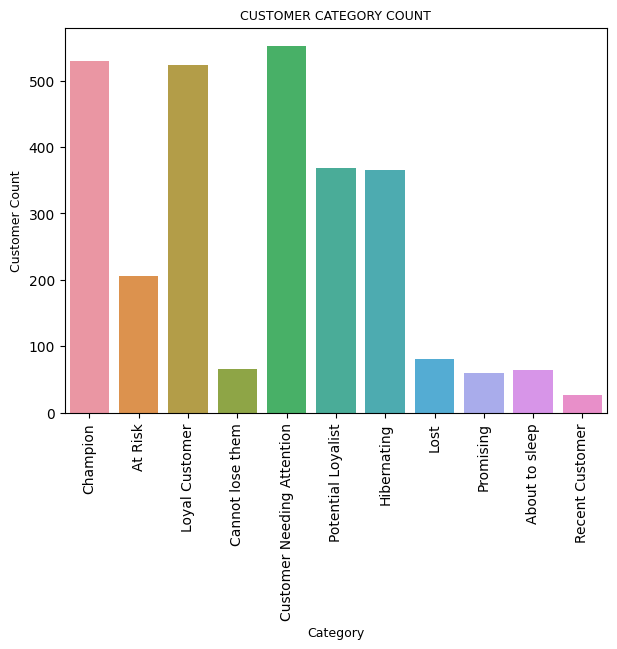

In [ ]:
#RFM Categories
plt.figure(figsize = (7,5))
sns.countplot(data=df_rfm, x='category')
plt.xticks(fontsize = 10, rotation=90)
plt.yticks(fontsize = 10)
plt.ylabel('Customer Count', fontsize=9)
plt.xlabel('Category', fontsize=9)
plt.title("CUSTOMER CATEGORY COUNT", fontsize=9)
plt.show()
